In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
data_dir="/content/drive/MyDrive/ML/green_trip_data_2017_7_clean.csv"
green_taxi_df= pd.read_csv(data_dir)

In [ ]:
green_taxi_df_copy=green_taxi_df.copy()

In [ ]:
# Extracting hours, minutes, and seconds from the 'trip_duration' column
green_taxi_df_copy['hours'] = green_taxi_df_copy['trip_duration'].apply(lambda x: int(x.split()[2].split(':')[0]))
green_taxi_df_copy['minutes'] = green_taxi_df_copy['trip_duration'].apply(lambda x: int(x.split()[2].split(':')[1]))
green_taxi_df_copy['seconds'] = green_taxi_df_copy['trip_duration'].apply(lambda x: int(x.split()[2].split(':')[2]))

# Formatting the 'trip_duration' column in HH:MM:SS format
green_taxi_df_copy['trip_duration_formatted'] = green_taxi_df_copy.apply(lambda row: '{:02}:{:02}:{:02}'.format(row['hours'], row['minutes'], row['seconds']), axis=1)

# Dropping intermediate columns if needed
green_taxi_df_copy = green_taxi_df_copy.drop(['hours', 'minutes', 'seconds', 'trip_duration'], axis=1)

In [ ]:
green_taxi_df_copy

,lpep_pickup_datetime,lpep_dropoff_datetime,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,rate_type_JFK,rate_type_Nassau or Westchester,rate_type_Negotiated fare,rate_type_Newark,rate_type_Standard rate,vendor_VeriFone Inc.,trip_type_Street-hail,refund_neg_duplicated_True,store_and_fwd_flag_Y,trip_duration_formatted
0,2017-07-01 00:16:40,2017-07-01 00:17:02,225,220,1,0.00,2.5,0.5,999.0,0.00,...,0,0,0,0,1,1,1,0,0,00:00:22
1,2017-07-01 00:56:23,2017-07-01 00:59:30,43,43,1,0.81,4.5,0.5,0.5,0.00,...,0,0,0,0,1,1,1,0,0,00:03:07
2,2017-07-01 00:15:25,2017-07-01 00:34:24,79,61,1,4.97,18.0,0.5,0.5,3.86,...,0,0,0,0,1,1,1,0,0,00:18:59
3,2017-07-01 00:55:06,2017-07-01 00:59:08,160,189,1,0.83,5.5,0.5,0.5,0.00,...,0,0,0,0,1,1,1,0,0,00:04:02
4,2017-07-01 00:34:05,2017-07-01 00:50:44,112,117,1,4.99,16.0,0.5,0.5,2.00,...,0,0,0,0,1,1,1,0,0,00:16:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913212,2017-07-31 23:07:26,2017-07-31 23:17:21,37,164,1,1.39,8.0,0.5,0.5,0.00,...,0,0,0,0,1,1,1,0,0,00:09:55
913213,2017-07-31 23:24:52,2017-07-31 23:38:26,139,108,1,2.51,11.0,0.5,0.5,1.70,...,0,0,0,0,1,1,1,0,0,00:13:34
913214,2017-07-31 23:39:33,2017-07-31 23:45:40,105,138,1,1.00,6.5,0.5,0.5,0.00,...,0,0,0,0,1,1,1,0,0,00:06:07
913215,2017-07-31 23:19:22,2017-07-31 23:29:59,105,21,1,2.18,10.0,0.5,0.5,0.00,...,0,0,0,0,1,1,1,0,0,00:10:37


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit KMeans model to 'total_amount' column
kmeans.fit(green_taxi_df_copy[['total_amount']])

# Predict the clusters for each data point
green_taxi_df_copy['cluster'] = kmeans.predict(green_taxi_df_copy[['total_amount']])

# Define labels for clusters based on centroid values or distribution
cluster_labels = {0: 'low', 1: 'medium', 2: 'high'}

# Map cluster labels to 'cluster' column
green_taxi_df_copy['trip_class'] = green_taxi_df_copy['cluster'].map(cluster_labels)

# View the clustered data with cluster labels
print(green_taxi_df_copy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       lpep_pickup_datetime lpep_dropoff_datetime  pu_location  do_location  \
0       2017-07-01 00:16:40   2017-07-01 00:17:02          225          220   
1       2017-07-01 00:56:23   2017-07-01 00:59:30           43           43   
2       2017-07-01 00:15:25   2017-07-01 00:34:24           79           61   
3       2017-07-01 00:55:06   2017-07-01 00:59:08          160          189   
4       2017-07-01 00:34:05   2017-07-01 00:50:44          112          117   
...                     ...                   ...          ...          ...   
913212  2017-07-31 23:07:26   2017-07-31 23:17:21           37          164   
913213  2017-07-31 23:24:52   2017-07-31 23:38:26          139          108   
913214  2017-07-31 23:39:33   2017-07-31 23:45:40          105          138   
913215  2017-07-31 23:19:22   2017-07-31 23:29:59          105           21   
913216  2017-07-30 05:32:22   2017-07-30 05:57:37          101          165   

        passenger_count  trip_distance  fare_amount

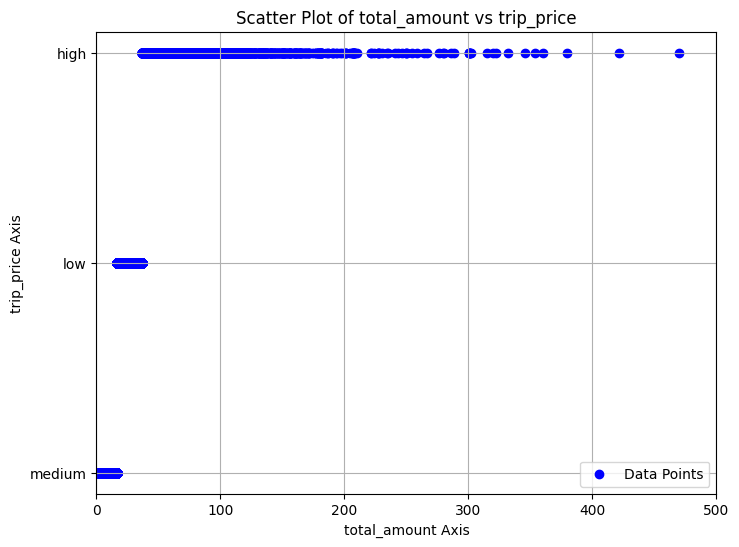

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(green_taxi_df_copy['total_amount'], green_taxi_df_copy['trip_class'], color='blue', label='Data Points')
plt.xlabel('total_amount Axis')
plt.ylabel('trip_price Axis')
plt.title('Scatter Plot of total_amount vs trip_price')
# Set limits for x and y axes
plt.xlim(0, 500)  # Adjust as needed
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
green_taxi_df_copy['trip_class'] = green_taxi_df_copy['trip_class'].replace({'low': 'medium', 'medium': 'low'})

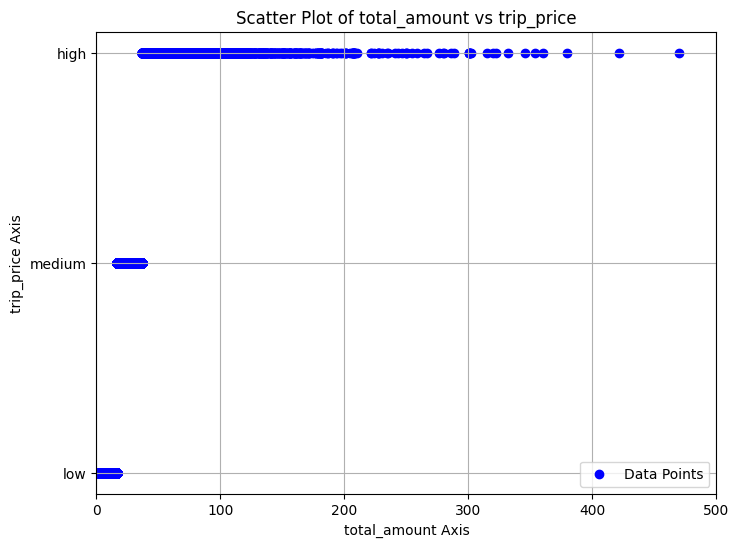

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(green_taxi_df_copy['total_amount'], green_taxi_df_copy['trip_class'], color='blue', label='Data Points')
plt.xlabel('total_amount Axis')
plt.ylabel('trip_price Axis')
plt.title('Scatter Plot of total_amount vs trip_price')
# Set limits for x and y axes
plt.xlim(0, 500)  # Adjust as needed
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
max_min_values = green_taxi_df_copy.groupby('trip_class')['total_amount'].agg(['max', 'min'])
max_min_values

,max,min
trip_class,,
high,1899.80,37.13
low,16.50,-4.80
medium,37.11,16.52


In [ ]:
count_occurrences = green_taxi_df_copy['trip_class'].value_counts()
count_occurrences

trip_class
low       661558
medium    216548
high       35111
Name: count, dtype: int64

In [ ]:
# Calculate frequency of each value
value_counts = green_taxi_df_copy['total_amount'].value_counts()

# Define bins based on frequency
low_cutoff = value_counts.quantile(1/3)
high_cutoff = value_counts.quantile(2/3)

# Function to map frequency to categories
def map_frequency_to_category(freq):
    if freq <= low_cutoff:
        return 'Low'
    elif freq <= high_cutoff:
        return 'Medium'
    else:
        return 'High'

# Add frequency category column
green_taxi_df_copy['Frequancy_category'] = green_taxi_df_copy['total_amount'].map(value_counts).apply(map_frequency_to_category)



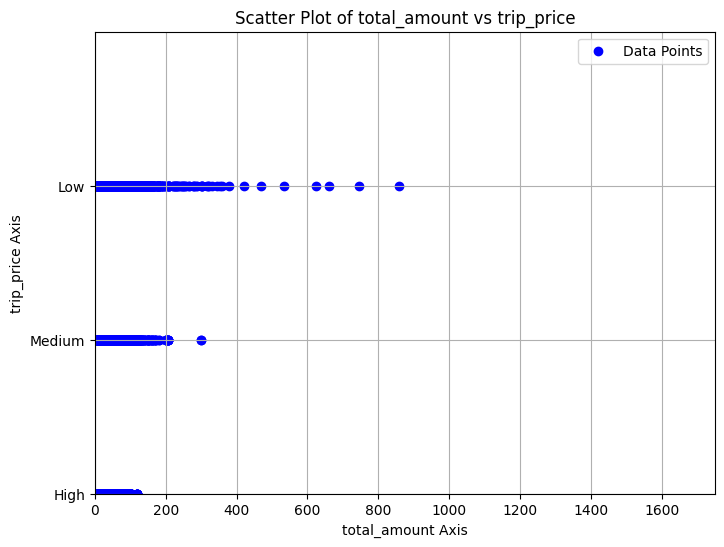

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(green_taxi_df_copy['total_amount'], green_taxi_df_copy['Frequancy_category'], color='blue', label='Data Points')
plt.xlabel('total_amount Axis')
plt.ylabel('trip_price Axis')
plt.title('Scatter Plot of total_amount vs trip_price')
# Set limits for x and y axes
plt.xlim(0, 1750)  # Adjust as needed
plt.ylim(0, 3)    # Adjust as needed
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
import pandas as pd
from datetime import timedelta

# Sample DataFrame
df = pd.DataFrame({'Time': ["00:10:40", "51:20:15", "36:30:00"]})

# Function to convert time string to total minutes
def convert_to_minutes(time_str):
    hours, minutes, seconds = map(int, time_str.split(':'))
    time_obj = timedelta(hours=hours, minutes=minutes, seconds=seconds)
    return time_obj.total_seconds()

# Apply conversion function to DataFrame column
green_taxi_df_copy['trip_duration'] = green_taxi_df_copy['trip_duration_formatted'].apply(convert_to_minutes)


In [ ]:
# Convert DateTime column to datetime format
green_taxi_df_copy['lpep_pickup_datetime'] = pd.to_datetime(green_taxi_df_copy['lpep_pickup_datetime'])

# Extract day and create a new column
green_taxi_df_copy['Day'] = green_taxi_df_copy['lpep_pickup_datetime'].dt.day

In [ ]:
# Round time to nearest hour
green_taxi_df_copy['pickup_time'] = pd.to_timedelta(green_taxi_df_copy['pickup_time'])

green_taxi_df_copy['Time_Hours'] = green_taxi_df_copy['pickup_time'].dt.round('H')

# Extract hour from rounded time
green_taxi_df_copy['Hour'] = green_taxi_df_copy['Time_Hours'].dt.components['hours']

In [ ]:
green_taxi_df_copy

,lpep_pickup_datetime,lpep_dropoff_datetime,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,store_and_fwd_flag_Y,trip_duration_formatted,trip_price,cluster,trip_class,Frequancy_category,trip_duration,Day,Time_Hours,Hour
0,2017-07-01 00:16:40,2017-07-01 00:17:02,225,220,1,0.00,2.5,0.5,999.0,0.00,...,0,00:00:22,High,1,low,High,22.0,1,0 days 00:00:00,0
1,2017-07-01 00:56:23,2017-07-01 00:59:30,43,43,1,0.81,4.5,0.5,0.5,0.00,...,0,00:03:07,High,1,low,High,187.0,1,0 days 01:00:00,1
2,2017-07-01 00:15:25,2017-07-01 00:34:24,79,61,1,4.97,18.0,0.5,0.5,3.86,...,0,00:18:59,High,0,medium,High,1139.0,1,0 days 00:00:00,0
3,2017-07-01 00:55:06,2017-07-01 00:59:08,160,189,1,0.83,5.5,0.5,0.5,0.00,...,0,00:04:02,High,1,low,High,242.0,1,0 days 01:00:00,1
4,2017-07-01 00:34:05,2017-07-01 00:50:44,112,117,1,4.99,16.0,0.5,0.5,2.00,...,0,00:16:39,High,0,medium,High,999.0,1,0 days 01:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913212,2017-07-31 23:07:26,2017-07-31 23:17:21,37,164,1,1.39,8.0,0.5,0.5,0.00,...,0,00:09:55,High,1,low,High,595.0,31,0 days 23:00:00,23
913213,2017-07-31 23:24:52,2017-07-31 23:38:26,139,108,1,2.51,11.0,0.5,0.5,1.70,...,0,00:13:34,High,1,low,High,814.0,31,0 days 23:00:00,23
913214,2017-07-31 23:39:33,2017-07-31 23:45:40,105,138,1,1.00,6.5,0.5,0.5,0.00,...,0,00:06:07,High,1,low,High,367.0,31,1 days 00:00:00,0
913215,2017-07-31 23:19:22,2017-07-31 23:29:59,105,21,1,2.18,10.0,0.5,0.5,0.00,...,0,00:10:37,High,1,low,High,637.0,31,0 days 23:00:00,23


In [ ]:
green_taxi_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913217 entries, 0 to 913216
Data columns (total 36 columns):
 #   Column                           Non-Null Count   Dtype          
---  ------                           --------------   -----          
 0   lpep_pickup_datetime             913217 non-null  datetime64[ns] 
 1   lpep_dropoff_datetime            913217 non-null  object         
 2   pu_location                      913217 non-null  int64          
 3   do_location                      913217 non-null  int64          
 4   passenger_count                  913217 non-null  int64          
 5   trip_distance                    913217 non-null  float64        
 6   fare_amount                      913217 non-null  float64        
 7   extra                            913217 non-null  float64        
 8   mta_tax                          913217 non-null  float64        
 9   tip_amount                       913217 non-null  float64        
 10  tolls_amount                    

In [ ]:
green_taxi_new = green_taxi_df_copy.drop(['Time_Hours','pickup_time','dropoff_time','date_range','total_amount', 'cluster', 'trip_duration_formatted','store_and_fwd_flag_Y','lpep_pickup_datetime','lpep_dropoff_datetime','vendor_VeriFone Inc.','Frequancy_category','trip_price'], axis =1)

In [ ]:
green_taxi_new

,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,rate_type_Nassau or Westchester,rate_type_Negotiated fare,rate_type_Newark,rate_type_Standard rate,trip_type_Street-hail,refund_neg_duplicated_True,trip_class,trip_duration,Day,Hour
0,225,220,1,0.00,2.5,0.5,999.0,0.00,0.0,0.3,...,0,0,0,1,1,0,low,22.0,1,0
1,43,43,1,0.81,4.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,low,187.0,1,1
2,79,61,1,4.97,18.0,0.5,0.5,3.86,0.0,0.3,...,0,0,0,1,1,0,medium,1139.0,1,0
3,160,189,1,0.83,5.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,low,242.0,1,1
4,112,117,1,4.99,16.0,0.5,0.5,2.00,0.0,0.3,...,0,0,0,1,1,0,medium,999.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913212,37,164,1,1.39,8.0,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,low,595.0,31,23
913213,139,108,1,2.51,11.0,0.5,0.5,1.70,0.0,0.3,...,0,0,0,1,1,0,low,814.0,31,23
913214,105,138,1,1.00,6.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,low,367.0,31,0
913215,105,21,1,2.18,10.0,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,low,637.0,31,23


In [ ]:
green_taxi_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913217 entries, 0 to 913216
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   pu_location                      913217 non-null  int64  
 1   do_location                      913217 non-null  int64  
 2   passenger_count                  913217 non-null  int64  
 3   trip_distance                    913217 non-null  float64
 4   fare_amount                      913217 non-null  float64
 5   extra                            913217 non-null  float64
 6   mta_tax                          913217 non-null  float64
 7   tip_amount                       913217 non-null  float64
 8   tolls_amount                     913217 non-null  float64
 9   improvement_surcharge            913217 non-null  float64
 10  payment_type                     913217 non-null  int64  
 11  week_number                      913217 non-null  int64  
 12  ra

In [ ]:
green_taxi_new.to_csv('/content/drive/My Drive/ML/ML_df.csv', index=False)

In [ ]:
data_dir="/content/drive/MyDrive/ML/ML_df.csv"
green_df= pd.read_csv(data_dir)
green_df

,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,rate_type_Nassau or Westchester,rate_type_Negotiated fare,rate_type_Newark,rate_type_Standard rate,trip_type_Street-hail,refund_neg_duplicated_True,trip_class,trip_duration,Day,Hour
0,225,220,1,0.00,2.5,0.5,999.0,0.00,0.0,0.3,...,0,0,0,1,1,0,low,22.0,1,0
1,43,43,1,0.81,4.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,low,187.0,1,1
2,79,61,1,4.97,18.0,0.5,0.5,3.86,0.0,0.3,...,0,0,0,1,1,0,medium,1139.0,1,0
3,160,189,1,0.83,5.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,low,242.0,1,1
4,112,117,1,4.99,16.0,0.5,0.5,2.00,0.0,0.3,...,0,0,0,1,1,0,medium,999.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913212,37,164,1,1.39,8.0,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,low,595.0,31,23
913213,139,108,1,2.51,11.0,0.5,0.5,1.70,0.0,0.3,...,0,0,0,1,1,0,low,814.0,31,23
913214,105,138,1,1.00,6.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,low,367.0,31,0
913215,105,21,1,2.18,10.0,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,low,637.0,31,23


In [ ]:
# at the pre-processing the data is already normalize in the data engineering project and then i try to fix all objects to be classified into int values by using the discretication
#and that was done in all object features such as ( datetime / trip duartion) and also we have deleted some features that won't affect out classification such as (Vendor-type/ trip type)
#at the end we have discretize our output target feature which is trip amount and make it to be classfified between (High /Medium/Low)
#after using different technquies frequancy based get out the best result and best classfiers